In [ ]:
from google.colab import files
data = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
import numpy as np
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
import matplotlib.pyplot as plt

class KMeanClustering: 

  def __init__(self, x_train, number_of_cluster): 
        self.K = number_of_cluster
        self.max_iterations = 100
        self.num_examples, self.num_features = x_train.shape
        self.plot_figure = True 

  def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features))
        for k in range(self.K): 
            centroid = X[np.random.choice(range(self.num_examples))]
            centroids[k] = centroid
        return centroids

  def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            )
            clusters[closest_centroid].append(point_idx)
        return clusters 
    
  def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0)
            centroids[idx] = new_centroid
        return centroids 

  def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
  def plot_fig(self, X, y):
        fig = plt.scatter(X[:, 0], X[:, 1], c=y)
        fig.show()

  def fit(self, X):
        centroids = self.initialize_random_centroids(X)
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids)
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X)
            diff = centroids - previous_centroids
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X)
        return y_pred

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [ ]:
dataset = data.iloc[:50,1:].values

In [ ]:

kmeancluster = KMeanClustering(dataset, 3)

In [ ]:
y_pred = kmeancluster.fit(dataset)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

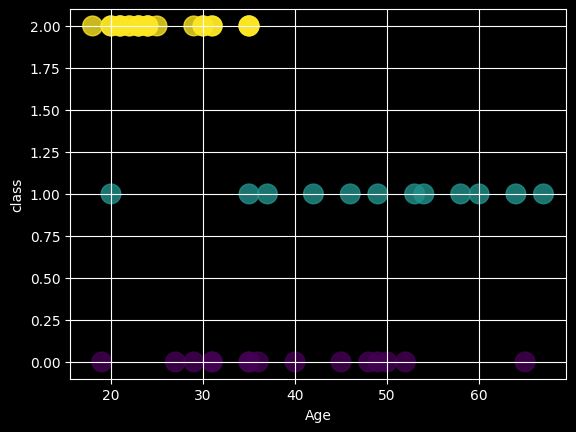

In [ ]:
plt.scatter(dataset[:, 1:2],y_pred, c = y_pred, s = 200, alpha = 0.8)
plt.grid(True)
data.columns
plt.xlabel(data.columns[2]) 
plt.ylabel("class")
plt.show()


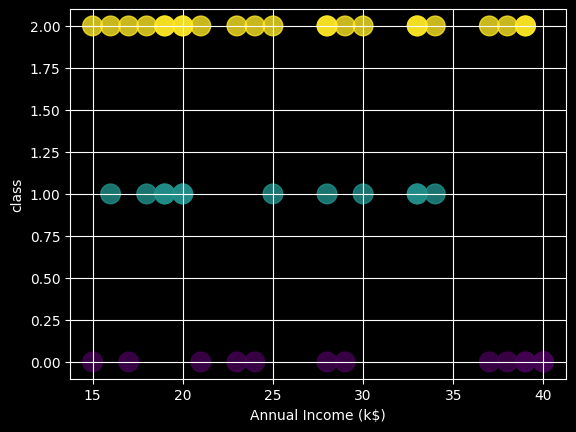

In [ ]:
plt.scatter(dataset[:, 2:3], y_pred, c = y_pred, s = 200, alpha = 0.8)
data.columns
plt.xlabel(data.columns[3]) 
plt.grid(True)
plt.ylabel("class")
plt.show()


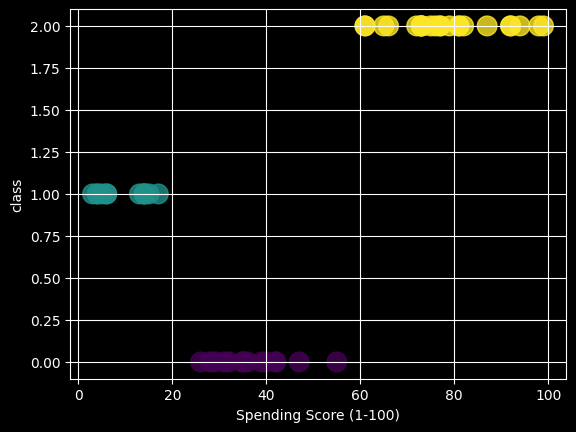

In [ ]:
plt.scatter(dataset[:, 3:4], y_pred, c = y_pred, s = 200, alpha = 0.8)
plt.grid(True)
plt.xlabel(data.columns[4]) 
plt.ylabel("class")
plt.show()


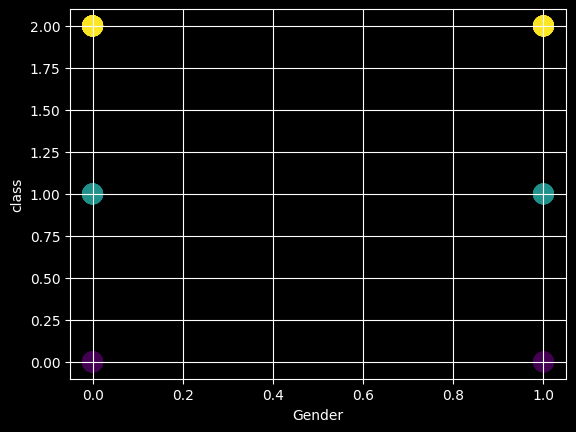

In [ ]:
plt.scatter(dataset[:, 0:1], y_pred, c = y_pred, s = 200, alpha = 0.8)
data.columns
plt.grid(True)
plt.xlabel(data.columns[1]) 
plt.ylabel("class")
plt.show()
